## 作业2：使用进化策略优化Restrigr函数
2112105068 韦青茂

Rastrigr函数的实现：

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def Rastrigr(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    return np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x) + 10, axis=-1)

def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = False


### 1. (1+1)~ES爬山法
此处实现为无标准差自适应的1+1算法

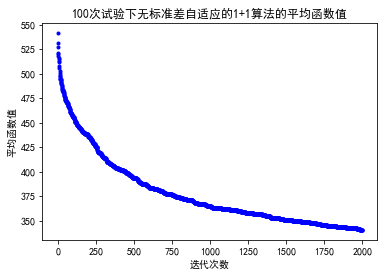

In [6]:
LB, UB = -5.12, 5.12                # 输入变量的取值范围
N_DIM = 30                          # 输入变量的维度
MAX_ITER = 2000                          # 迭代次数
Y_history = [[] for _ in range(MAX_ITER)]
for _ in range(100):                    # 100次试验
    sigma = 0.5*np.ones(N_DIM)          # 初始化非负变异方差
    x = randomF(LB, UB, [N_DIM])        # 随机生成个体
    for i in range(MAX_ITER):
        r = np.random.randn(N_DIM)
        if Rastrigr(x + r) < Rastrigr(x):
            x = x + r
        Y_history[i].append(Rastrigr(x))

# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in Y_history]
figure = plt.plot(idx, avgY, '.', color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均函数值")
plt.title("100次试验下无标准差自适应的1+1算法的平均函数值")
plt.show()

### 2. (1,1)~ES随机搜索法

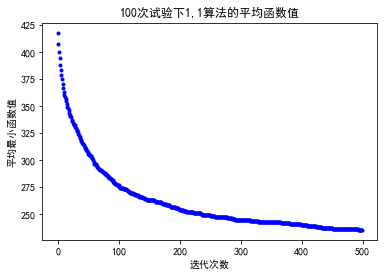

In [7]:
MAX_ITER = 500                      # 迭代次数
POP_SIZE = 50                       # 种群规模
avgY = [[] for _ in range(MAX_ITER)]
minY = [[] for _ in range(MAX_ITER)]
for _ in range(100):                # 100次试验
    # 初始化非负变异方差
    sigma = [np.abs(np.random.randn(N_DIM)) for _ in range(POP_SIZE)]  
    # 随机生成个体
    x = [randomF(LB, UB, [N_DIM]) for _ in range(POP_SIZE)]    
    for i in range(MAX_ITER):
        # 随机选一对父母
        parent_idx = np.random.choice(POP_SIZE, 2, replace=False)
        # 交配，这里采用中间性交(取父母的平均值)
        child_sigma = (sigma[parent_idx[0]] + sigma[parent_idx[1]])/2
        child_x = (x[parent_idx[0]] + x[parent_idx[1]])/2
        # 生成随机向量r
        r = [np.random.randn() * s for s in child_sigma]
        child_x = child_x + r
        x.append(child_x)
        y = Rastrigr(x)
        # 淘汰最差的一个个体
        x = [x[s] for s in np.argsort(y)[:-1]]
        avgY[i].append(np.average(y))
        minY[i].append(np.min(y))

# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in minY]
figure = plt.plot(idx, avgY, '.', color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均最小函数值")
plt.title("100次试验下1,1算法的平均函数值")
plt.show()